<a href="https://colab.research.google.com/github/taceharris/Projects/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1, Scraping Reddit Data

In [ ]:
#import libraries
!pip install praw
import requests
import pandas as pd
import praw
from datetime import datetime

# Passing your details
reddit = praw.Reddit(client_id='qiP1kKIj5W_2_4sCYGmyWw',
                     client_secret='m1ge7qCBT2NqwDPembOOPM8HxAOKiw',
                     user_agent='ApprehensiveRip5272')


In [ ]:
# URL of the post
url = "https://www.reddit.com/r/AskReddit/comments/1aucsdb/people_with_disabilities_what_is_something_that/"

# Creating a submission object
submission = reddit.submission(url=url)

# Checking out the content/properties of the post
submission.id

# Get the number of comments
print("Number of comments in the post:", submission.num_comments)

from praw.models import MoreComments			# Importing needed function from praw package

post_comments = []										# Create an empty list

for comment in submission.comments: 				# Initiate a for loop through the comment forest
	if type(comment) == MoreComments:				# This helps to handle objects that has “load more comments” and “continue this thread”.
		continue

	post_comments.append(comment.body) 			# Append the comment body to the empty list

# creating a dataframe
comments_df = pd.DataFrame(post_comments, columns=['comment']) 		# Convert the 'post_comments' list to dataframe and naming the column.
comments_df

# Including all the comments within comments
post_comments = []  # Create an empty list


submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
 post_comments.append([comment.body, comment.ups, comment.downs, comment.created]) # Append the comment body to the empty list

# creating a dataframe
# Convert the 'post_comments' list to dataframe and naming the column.
comments_df = pd.DataFrame(post_comments, columns=['comment', 'ups', 'downs', 'created'])
comments_df

# Add character and word counts
comments_df['num_chars'] = comments_df['comment'].apply(len)
comments_df['num_words'] = comments_df['comment'].apply(lambda x: len(x.split()))



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Number of comments in the post: 2063


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

#2 Running Sentiment Analysis Through VADER

In [ ]:
#Clean Data
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def reddit_clean(redd):
    redd = str(redd).lower()
    redd = re.sub("'", "", redd)
    redd = re.sub("@[A-Za-z0-9_]+", "", redd)
    redd = re.sub("#[A-Za-z0-9_]+", "", redd)
    redd = re.sub(r"www.\S+", "", redd)
    redd = re.sub(r"http\S+", "", redd)
    redd = re.sub('[()!?]', ' ', redd)
    redd = re.sub('\[.*?\]', ' ', redd)
    redd = re.sub(r"\d+", "", redd)
    redd = re.sub("[^a-z]", " ", redd)
    redd = re.sub(r"\b\w{1,2}\b", " ", redd)
    redd = redd.split()
    stopwords_set = set(stopwords.words('english'))
    redd = [w for w in redd if not w in stopwords_set]
    redd = " ".join(word for word in redd)
    return redd

#Apply reddit_clean function to dataset
comments_df['comment'] = comments_df['comment'].apply(reddit_clean)
comments_df.head()                                                          # Displays the first few rows of the cleaned DataFrame

# Tokenize the comments
tokenized_reddit_post = comments_df['comment'].apply(lambda x: x.split())
print(tokenized_reddit_post)

#Stemming the comments
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
tokenized_reddit_post = tokenized_reddit_post.apply(lambda x: [stemmer.stem(i) for i in x])
comments_df['tokenized']= tokenized_reddit_post
comments_df.head().head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0       [cant, turn, navigate, life, hiding, consumes,...
1       [think, frustrated, limitations, wait, find, f...
2              [something, today, doesnt, mean, tomorrow]
3                                 [disabilities, visible]
4       [worked, someone, muscular, dystrophy, disease...
                              ...                        
2036    [god, would, drive, wall, people, need, mind, ...
2037    [thanks, appreciate, support, bizarre, feel, a...
2038    [everyone, relate, hope, feel, little, less, a...
2039                             [thanks, youre, awesome]
2040                                           [likewise]
Name: comment, Length: 2041, dtype: object


,comment,ups,downs,created,num_chars,num_words,tokenized
0,cant turn navigate life hiding consumes energy...,3489,0,1.708315e+09,264,48,"[cant, turn, navig, life, hide, consum, energi..."
1,think frustrated limitations wait find feel,4185,0,1.708316e+09,105,19,"[think, frustrat, limit, wait, find, feel]"
2,something today doesnt mean tomorrow,6770,0,1.708317e+09,66,14,"[someth, today, doesnt, mean, tomorrow]"
3,disabilities visible,3162,0,1.708312e+09,32,5,"[disabl, visibl]"
4,worked someone muscular dystrophy disease earl...,7432,0,1.708313e+09,1076,192,"[work, someon, muscular, dystrophi, diseas, ea..."


In [ ]:
#Import Libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the lexicon
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the compound sentiment score
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

# Apply sentiment analysis to each comment
comments_df['sentiment'] = comments_df['comment'].apply(get_sentiment)

# Categorize Sentiment
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

comments_df['sentiment_label'] = comments_df['sentiment'].apply(label_sentiment)

# Preview
comments_df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,comment,ups,downs,created,num_chars,num_words,tokenized,sentiment,sentiment_label
0,cant turn navigate life hiding consumes energy...,3489,0,1.708315e+09,264,48,"[cant, turn, navig, life, hide, consum, energi...",0.4588,Positive
1,think frustrated limitations wait find feel,4185,0,1.708316e+09,105,19,"[think, frustrat, limit, wait, find, feel]",-0.5267,Negative
2,something today doesnt mean tomorrow,6770,0,1.708317e+09,66,14,"[someth, today, doesnt, mean, tomorrow]",0.0000,Neutral
3,disabilities visible,3162,0,1.708312e+09,32,5,"[disabl, visibl]",0.0000,Neutral
4,worked someone muscular dystrophy disease earl...,7432,0,1.708313e+09,1076,192,"[work, someon, muscular, dystrophi, diseas, ea...",-0.9290,Negative


#3 Explore Data

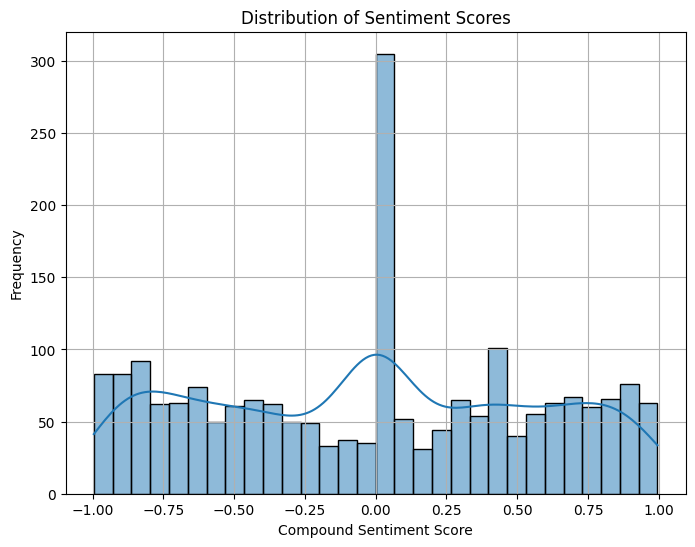

<ipython-input-16-29b7e6cf267f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=comments_df, x='sentiment_label', palette='Set2')


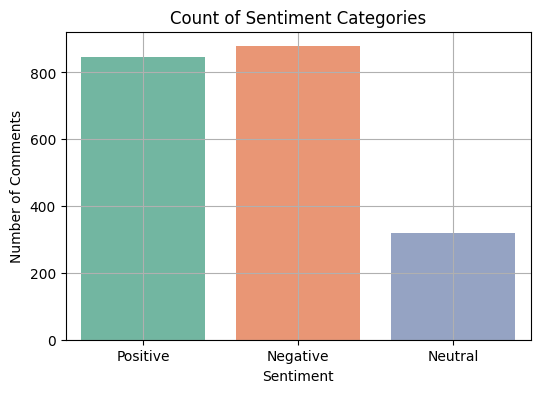

Sample Positive Comments:

cant turn navigate life hiding consumes energy imagine even chance might encounter something cant overcome selective days win days lose
never pain good masking
able drive disability huge impact life

Sample Negative Comments:

think frustrated limitations wait find feel
worked someone muscular dystrophy disease early stages progressing muscular dystrophy diseases fatal treatments slow progression cure looked young healthy never failed someone would say something rode elevator work floor floor wouldnt even use handicap parking tag didnt want deal comments people thinking shes using park closer shes lazy even though still looked healthy would get breath faster others diaphragm weakening talked much one day would start slurring words tongue would tired people forget thats muscle hate quick non disabled people even disabled people judge someone looks healthy edit pointed misspoke fatal mistake majority familiar misinformed
pain days less pain also cant squeeze er

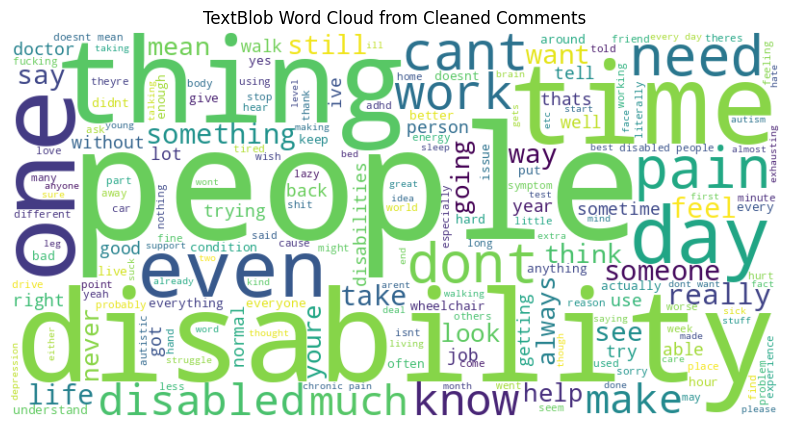

<ipython-input-16-29b7e6cf267f>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_upvotes, x='sentiment_label', y='ups', palette='Set2')


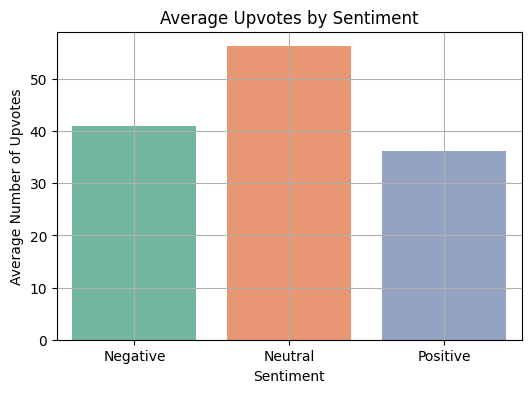

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of sentiment scores
plt.figure(figsize=(8, 6))
sns.histplot(comments_df['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot count of sentiment categories
plt.figure(figsize=(6, 4))
sns.countplot(data=comments_df, x='sentiment_label', palette='Set2')
plt.title('Count of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.grid(True)
plt.show()

# Display sample positive and negative comments
sample_positive = comments_df[comments_df['sentiment_label'] == 'Positive']['comment'].head(3)
sample_negative = comments_df[comments_df['sentiment_label'] == 'Negative']['comment'].head(3)

print("Sample Positive Comments:\n")
print("\n".join(sample_positive))

print("\nSample Negative Comments:\n")
print("\n".join(sample_negative))

# Generate Word Cloud using TextBlob-cleaned text
from wordcloud import WordCloud
from textblob import TextBlob

# Combine all cleaned text from the 'comment' column
all_text_blob = ' '.join(comments_df['comment'].dropna())

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text_blob)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('TextBlob Word Cloud from Cleaned Comments')
plt.show()

#Bar chart to show the realtionship between sentiment and upvotes
avg_upvotes = comments_df.groupby('sentiment_label')['ups'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=avg_upvotes, x='sentiment_label', y='ups', palette='Set2')
plt.title('Average Upvotes by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Number of Upvotes')
plt.grid(True)
plt.show()



#Extra Credit 1

Create word clouds for psoitve and negative sentiments

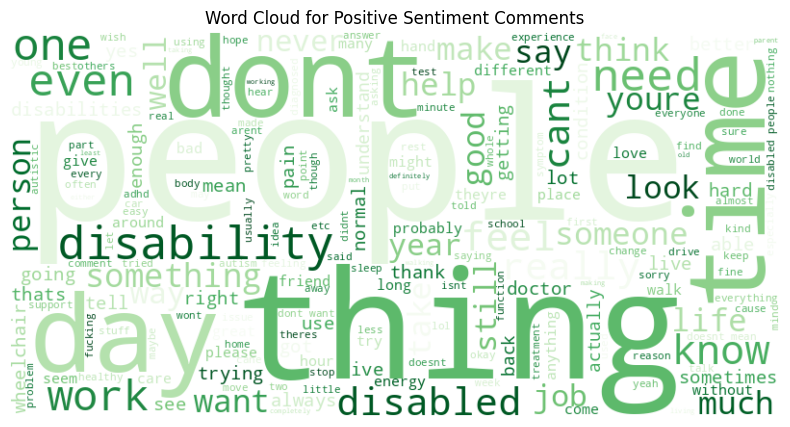

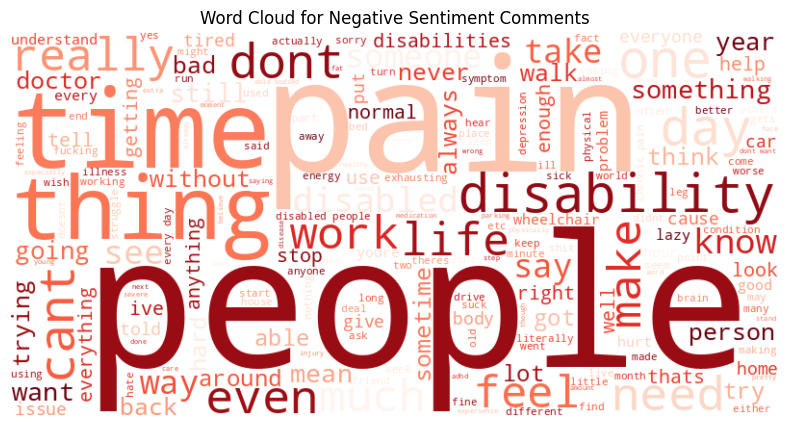

In [ ]:
# Filter comments by sentiment
positive_comments = comments_df[comments_df['sentiment_label'] == 'Positive']['comment'].dropna()
negative_comments = comments_df[comments_df['sentiment_label'] == 'Negative']['comment'].dropna()

# Combine text
positive_text = " ".join(positive_comments)
negative_text = " ".join(negative_comments)

# Generate word clouds
positive_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Plot Positive Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Sentiment Comments")
plt.show()

# Plot Negative Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Sentiment Comments")
plt.show()

#4 Machine Learning to Predict Sentiment

In [ ]:
# Machine Learning Model to Predict Sentiment (Binary: Positive vs. Negative)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Filter only Positive and Negative comments
filtered_df = comments_df[comments_df['sentiment_label'].isin(['Positive', 'Negative'])].copy()

# Extract VADER scores as model features
filtered_df['pos_score'] = filtered_df['comment'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
filtered_df['neg_score'] = filtered_df['comment'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
filtered_df['neu_score'] = filtered_df['comment'].apply(lambda x: analyzer.polarity_scores(x)['neu'])

# Define features and target (ups, pos_score, neg_score only)
X = filtered_df[['ups', 'pos_score', 'neg_score']]
y = filtered_df['sentiment_label'].map({'Positive': 1, 'Negative': 0})

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate model
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

[[226   3]
 [  8 194]]
              precision    recall  f1-score   support

           0      0.966     0.987     0.976       229
           1      0.985     0.960     0.972       202

    accuracy                          0.974       431
   macro avg      0.975     0.974     0.974       431
weighted avg      0.975     0.974     0.974       431



#Extra Credit 2 & 3

Compare 3 sentiment analyzers

In [ ]:
!pip install flair
from flair.models import TextClassifier
from flair.data import Sentence
from textblob import TextBlob
import pandas as pd
from sklearn.metrics import classification_report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Copy original cleaned DataFrame for DeBugging
comparison_df = comments_df.copy()


In [ ]:
# Apply TextBlob sentiment
comparison_df['textblob_score'] = comparison_df['comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

def textblob_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

comparison_df['textblob_sentiment'] = comparison_df['textblob_score'].apply(textblob_label)

In [ ]:
# Apply Flair sentiment with error handling
flair_classifier = TextClassifier.load('en-sentiment')  # Initialize Flair classifier
flair_sentiments = []
flair_scores = []

for text in comparison_df['comment']:
    try:
        sentence = Sentence(text)
        flair_classifier.predict(sentence)
        flair_sentiments.append(sentence.labels[0].value)
        flair_scores.append(sentence.labels[0].score)
    except Exception as e:
        flair_sentiments.append(None) # Or some default string value like 'Unknown'
        flair_scores.append(None)

comparison_df['flair_sentiment'] = flair_sentiments
comparison_df['flair_score'] = flair_scores

2025-04-16 22:55:20,927 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmp3jyqq8hm


100%|██████████| 253M/253M [00:12<00:00, 21.4MB/s]

2025-04-16 22:55:33,685 copying /tmp/tmp3jyqq8hm to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2025-04-16 22:55:34,768 removing temp file /tmp/tmp3jyqq8hm


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

2025-04-16 22:55:53,898 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2025-04-16 22:55:54,850 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2025-04-16 22:55:58,430 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2025-04-16 22:56:00,983 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2025-04-16 22:56:00,983 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2025-04-16 22:56:25,582 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2025-04-16 22:57:23,700 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2025-04-16 22:57:24,178 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2025-04-16 22:57:41,779 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2025-04-16 22:57:42,073 Warning: An empty Sentence was 

🔹 VADER vs TextBlob
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       658
           1       0.69      0.77      0.73       628

    accuracy                           0.72      1286
   macro avg       0.72      0.72      0.72      1286
weighted avg       0.72      0.72      0.72      1286

🔹 VADER vs Flair
              precision    recall  f1-score   support

           0       0.59      0.91      0.71       658
           1       0.78      0.32      0.46       628

    accuracy                           0.63      1286
   macro avg       0.69      0.62      0.59      1286
weighted avg       0.68      0.63      0.59      1286



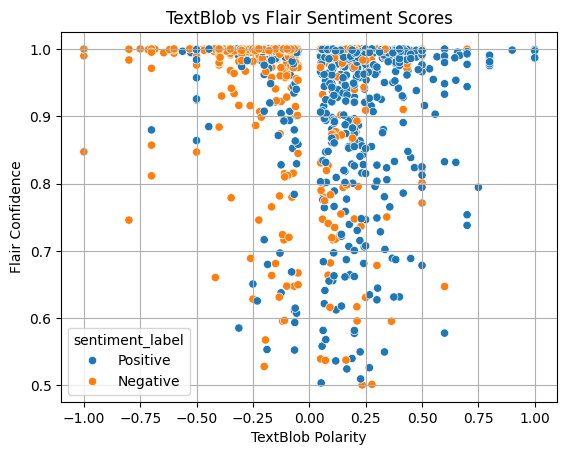

In [ ]:
# Drop rows with# Drop rows with any missing values across all 3 tools, but only if they're ALL None
comparison_df = comparison_df.dropna(subset=['sentiment_label', 'textblob_sentiment', 'flair_sentiment'], how='all')

# Filter to include only Positive and Negative sentiments, accounting for variations in label names
comparison_df = comparison_df[
    comparison_df['sentiment_label'].isin(['Positive', 'Negative']) &
    comparison_df['textblob_sentiment'].isin(['Positive', 'Negative']) &
    comparison_df['flair_sentiment'].astype(str).str.upper().isin(['POSITIVE', 'NEGATIVE'])  # Handle case variations and ensure string type
]

# Convert sentiment labels to binary for comparison (unchanged)
comparison_df['vader_binary'] = comparison_df['sentiment_label'].map({'Positive': 1, 'Negative': 0})
comparison_df['textblob_binary'] = comparison_df['textblob_sentiment'].map({'Positive': 1, 'Negative': 0})
comparison_df['flair_binary'] = comparison_df['flair_sentiment'].str.upper().map({'POSITIVE': 1, 'NEGATIVE': 0})  # Handle case variations


# Check if comparison_df is empty and provide feedback
if comparison_df.empty:
    print("⚠️ The filtered DataFrame is empty. No comments meet the criteria for comparison.")
else:
    # Print classification reports
    print("🔹 VADER vs TextBlob")
    print(classification_report(comparison_df['vader_binary'], comparison_df['textblob_binary']))

    print("🔹 VADER vs Flair")
    print(classification_report(comparison_df['vader_binary'], comparison_df['flair_binary']))
# Visual comparison of scores
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=comparison_df, x='textblob_score', y='flair_score', hue='sentiment_label')
plt.title("TextBlob vs Flair Sentiment Scores")
plt.xlabel("TextBlob Polarity")
plt.ylabel("Flair Confidence")
plt.grid(True)
plt.show()
